## Load Model, plain 2D Conv

In [3]:
import numpy as np
import torch
import json
from distributed.model_util import choose_model, choose_old_model, load_model, extend_model_config
from distributed.util import q_value_index_to_action
import matplotlib.pyplot as plt

In [4]:
model_name = "conv2d"
model_config_path = "src/config/model_spec/conv_agents_slim.json"
trained_model_path = "threshold_networks/5/72409/conv2d_5_72409.pt"

In [5]:
with open(model_config_path, "r") as jsonfile:
    model_config = json.load(jsonfile)[model_name]

code_size, stack_depth = 5, 5
syndrome_size = code_size + 1
model_config = extend_model_config(model_config, syndrome_size, stack_depth)
model_config["network_size"] = "slim"
model_config["rl_type"] = "q"

In [6]:
model = choose_model(model_name, model_config, transfer_learning=0)
model, *_ = load_model(model, trained_model_path, model_device="cpu")

Not using any recurrent module
Prepare Q Learning Conv2dAgent w/o transfer learning


In [ ]:
from evaluation.final_evaluation import main_evaluation

all_ground_states = 0
for i in range(10):
    is_ground_state, n_syndromes, n_loops = main_evaluation(
        model,
        model.device,
        epsilon=0.0,
        code_size=code_size,
        stack_depth=stack_depth,
        block=False,
        verbosity=0,
        rl_type=model_config["rl_type"]
    )
    
    all_ground_states += is_ground_state

print(all_ground_states)

In [10]:
print(all_ground_states)

9


## Prepare States

In [7]:
all_states = []


full_error_state = torch.zeros((stack_depth, syndrome_size, syndrome_size), dtype=torch.float32)
full_error_state[:, 1, 2] = 1
full_error_state[:, 2, 3] = 1

all_states.append(full_error_state)

for i in range(0, stack_depth, 2):
    state = torch.zeros((stack_depth, syndrome_size, syndrome_size), dtype=torch.float32)
    state[:, 1, 2] = 1
    state[:, 2, 3] = 1
    state[i, 2, 3] = 0
    
    all_states.append(state)

for i in range(0, stack_depth, 2):
    state = torch.zeros((stack_depth, syndrome_size, syndrome_size), dtype=torch.float32)
    state[i, 2, 3] = 1
    
    all_states.append(state)

state = torch.zeros((stack_depth, syndrome_size, syndrome_size), dtype=torch.float32)
state[-1, 1, 2] = 1
state[-1, 2, 3] = 1
all_states.append(state)

state = torch.zeros((stack_depth, syndrome_size, syndrome_size), dtype=torch.float32)
state[-2:, 1, 2] = 1
state[-2:, 2, 3] = 1
state[-1:, 2, 3] = 0
all_states.append(state)

state = torch.zeros((stack_depth, syndrome_size, syndrome_size), dtype=torch.float32)
state[-2:, 1, 2] = 1
all_states.append(state)

torch_all_states = torch.stack(all_states)

In [8]:
def calculate_state_image(state, stack_depth, syndrome_size):
    layer_discount_factor = 0.3
    layer_exponents = np.arange(stack_depth - 1, -1, -1)
    layer_rewards = np.power(layer_discount_factor, layer_exponents)
    layer_rewards = torch.tensor(layer_rewards, dtype=torch.float32)

    state_image = torch.zeros((syndrome_size, syndrome_size), dtype=torch.float32)
    for j, layer in enumerate(state):
        tmp_layer = layer * layer_rewards[j]
        state_image += tmp_layer

    return state_image

## Do the plotting

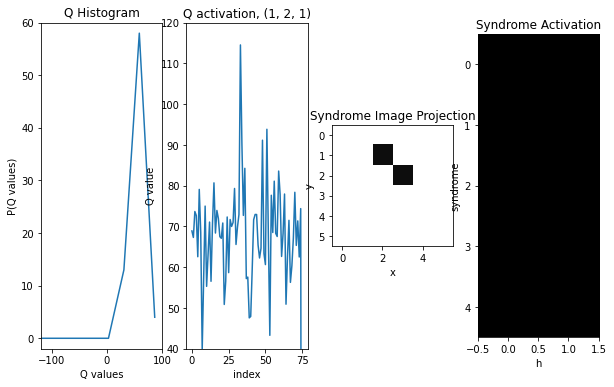

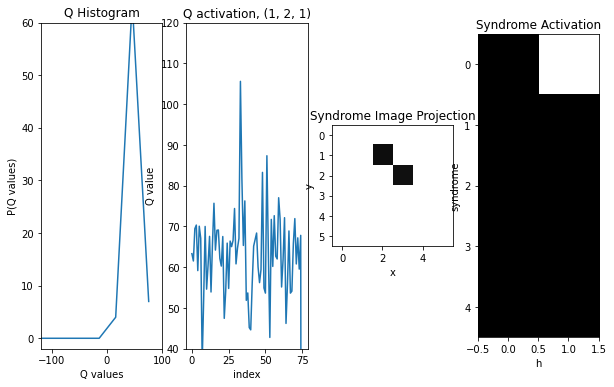

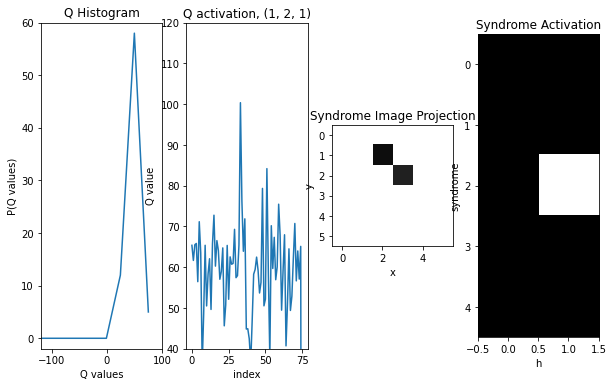

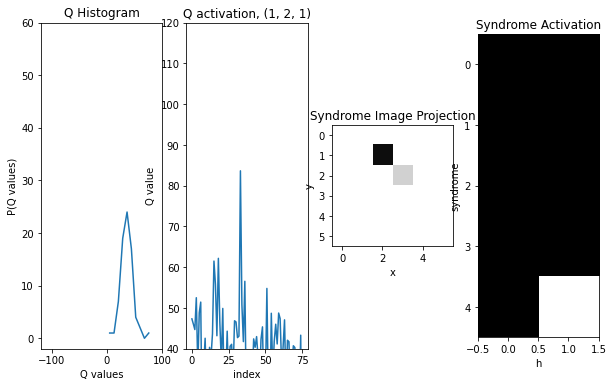

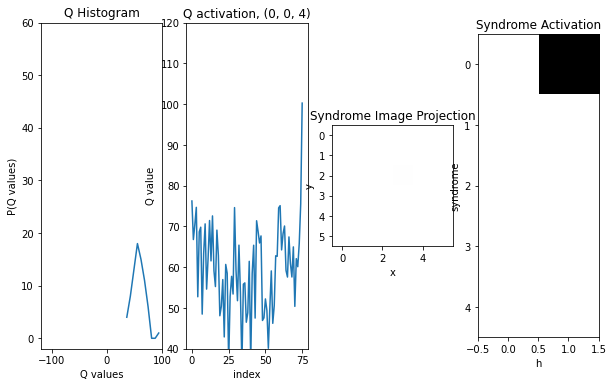

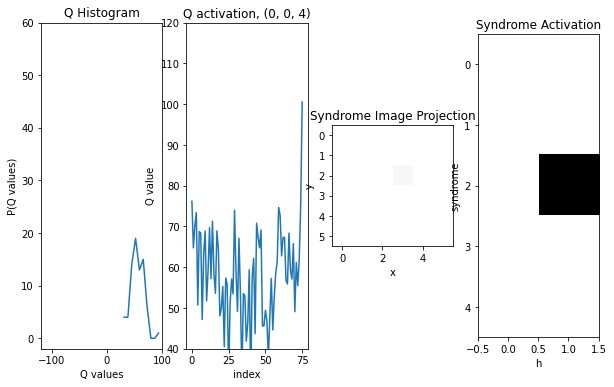

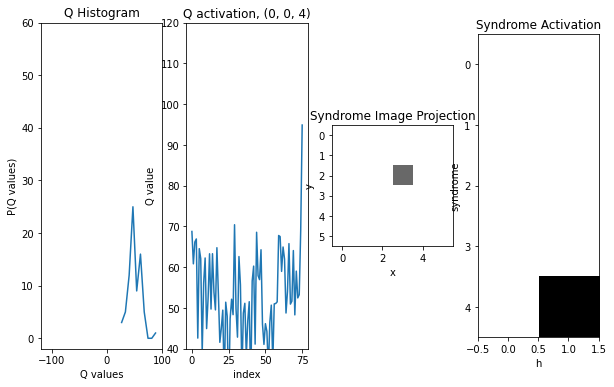

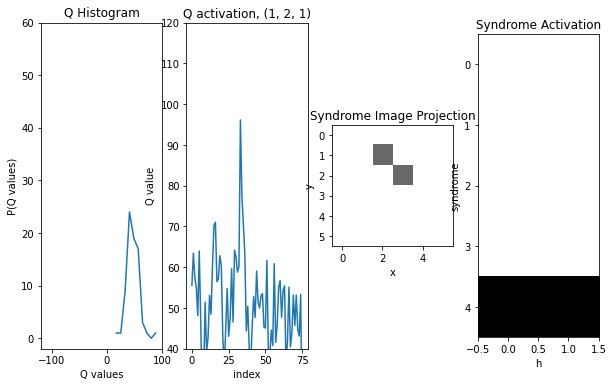

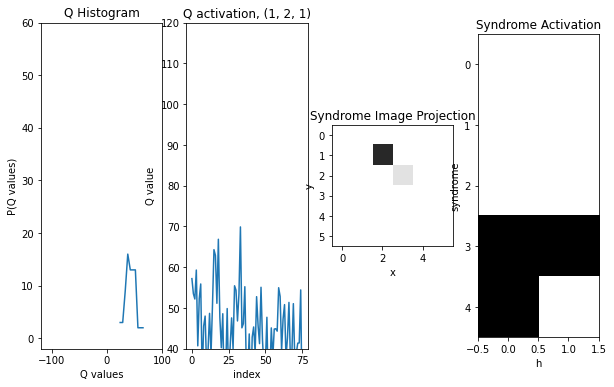

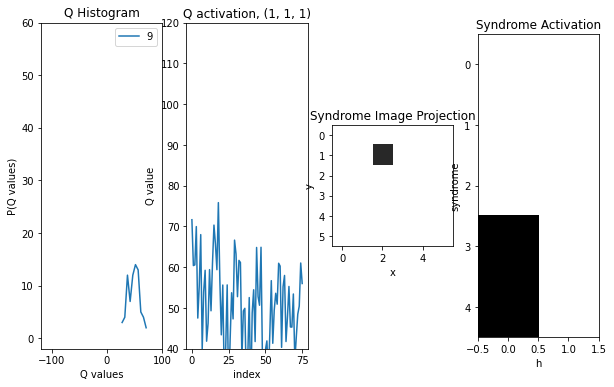

In [10]:
k = 1
# stack_depth = 5
# syndrome_size = 5


for i, state in enumerate(torch_all_states):
    fig, ax = plt.subplots(1, 4, figsize=(10, 6))
    q_values = model(state.unsqueeze(0))
    q_values = q_values.detach().squeeze().clone().numpy()
    
    ind = np.argpartition(q_values, -k)[-k:]
    action = q_value_index_to_action(ind[0], code_size)
    ind = np.append(ind, [max(ind[0]-1, 0), min(ind[0]+1, len(q_values)-1)])
    ind = np.sort(ind)
    
    q_hist = np.histogram(q_values)
    
    
    ax[0].plot(q_hist[1][:-1], q_hist[0], label=str(i))
    
#     ax[1].plot(ind, q_values[ind], label=str(i))
    ax[1].plot(range(len(q_values)), q_values, label=str(i))
    
    state_image = calculate_state_image(state, stack_depth, syndrome_size)
    ax[2].imshow(state_image, vmin=0, vmax=1.5, cmap="Greys")
    
    ax[3].imshow(
        np.hstack(
            (
                np.vstack(state[:, 1, 2]),
                np.vstack(state[:, 2, 3]),
            )
        ),
        vmin=0, vmax=1, cmap="Greys"
    )
    
    ax[0].set(ylim=(-2, 60), xlim=(-120, 100), xlabel="Q values", ylabel="P(Q values)", title=f"Q Histogram")
    ax[1].set(
        ylim=(40, 120), 
        xlabel="index", 
        ylabel="Q value", 
        title=f"Q activation, {action}", 
#         xlim=[max(ind[0], 0)-0.2, min(ind[-1], len(q_values)-1)+0.2]
    )
    ax[2].set(xlabel="x", ylabel="y", title="Syndrome Image Projection")
    ax[3].set(xlabel="h", ylabel="syndrome", title="Syndrome Activation")
    
ax[0].legend()
# ax[1].legend()
    
    

## 3D Conv

In [1]:
model_name = "conv3d"
model_config_path_3d = "src/config/model_spec/conv_agents_slim.json"
trained_model_path_3d = "threshold_networks/5/69312/conv3d_5_69312.pt"

In [2]:
with open(model_config_path_3d, "r") as jsonfile:
    model_config_3d = json.load(jsonfile)[model_name]

code_size, stack_depth = 5, 5
syndrome_size = code_size + 1
model_config_3d = extend_model_config(model_config_3d, syndrome_size, stack_depth)
model_config_3d["network_size"] = "slim"
model_config_3d["rl_type"] = "q"

NameError: name 'json' is not defined

In [10]:
model3d = choose_old_model(model_name, model_config_3d)
model3d, *_ = load_model(model3d, trained_model_path_3d, model_device="cpu")

In [ ]:
from evaluation.final_evaluation import main_evaluation

all_ground_states = 0
for i in range(10):
    is_ground_state, n_syndromes, n_loops = main_evaluation(
        model3d,
        model3d.device,
        epsilon=0.0,
        code_size=code_size,
        stack_depth=stack_depth,
        block=False,
        verbosity=0,
        rl_type=model_config_3d["rl_type"]
    )
    
    all_ground_states += is_ground_state

print(all_ground_states)

In [18]:
print(all_ground_states)

10


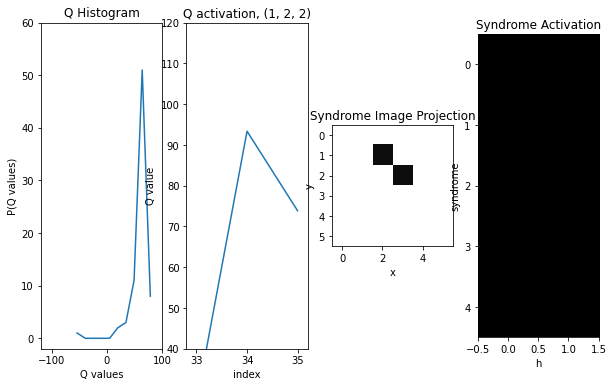

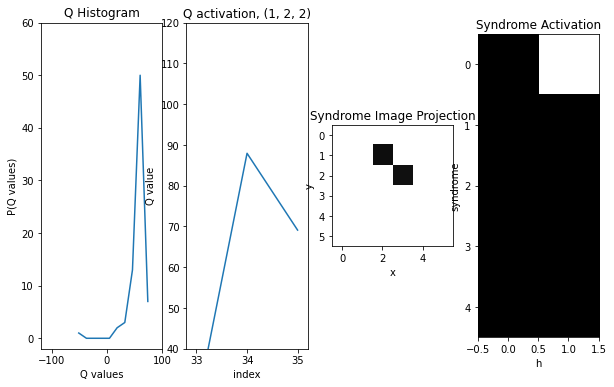

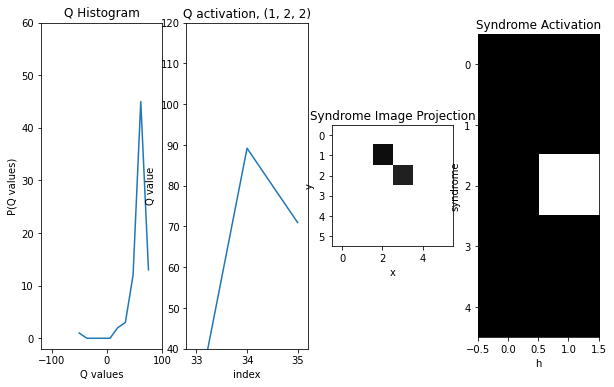

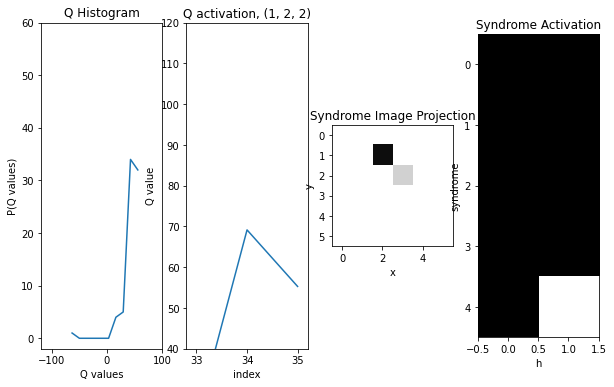

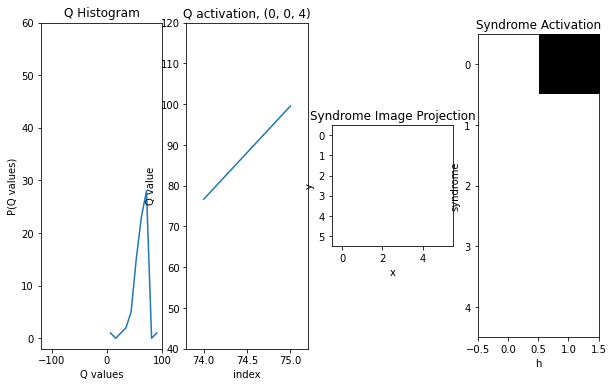

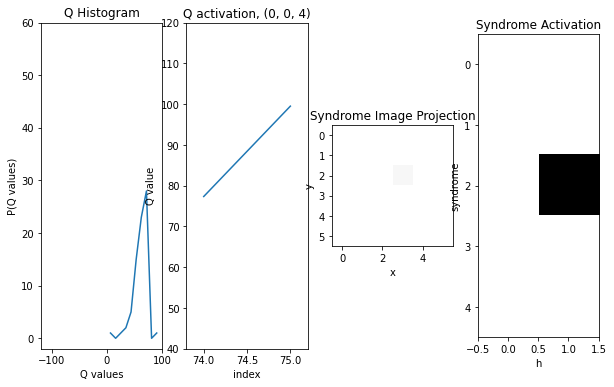

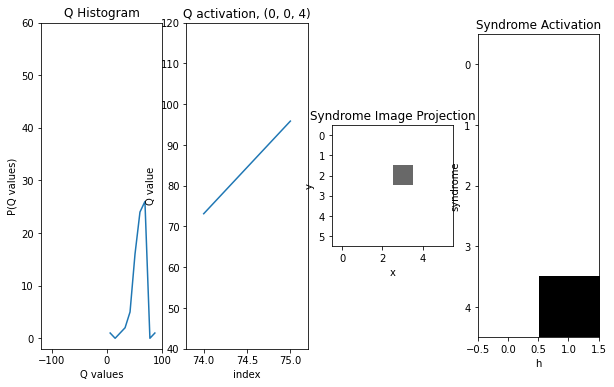

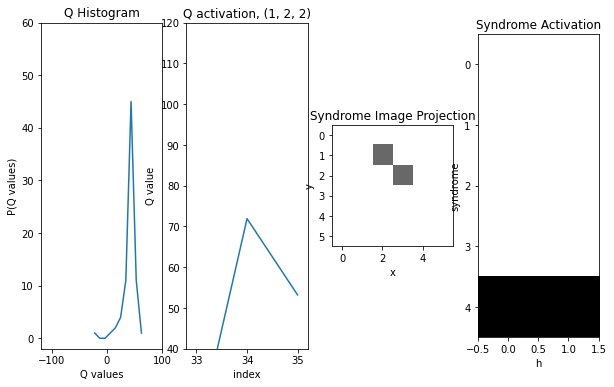

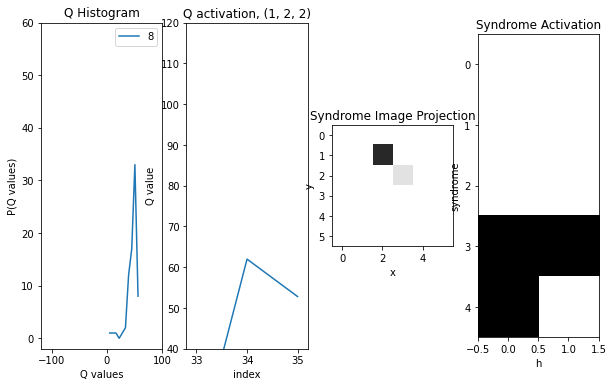

In [11]:
k = 1
# stack_depth = 5
# syndrome_size = 5


for i, state in enumerate(torch_all_states):
    fig, ax = plt.subplots(1, 4, figsize=(10, 6))
    q_values = model3d(state.unsqueeze(0))
    q_values = q_values[0].detach().squeeze().clone().numpy()
    
    ind = np.argpartition(q_values, -k)[-k:]
    action = q_value_index_to_action(ind[0], code_size)
    
    ind = np.append(ind, [max(ind[0]-1, 0), min(ind[0]+1, len(q_values)-1)])
    ind = np.sort(ind)
    
    q_hist = np.histogram(q_values)
    
    
    ax[0].plot(q_hist[1][:-1], q_hist[0], label=str(i))
    
#     ax[1].plot(ind, q_values[ind], label=str(i))
    ax[1].plot(range(len(q_values)), q_values, label=str(i))
    
    state_image = calculate_state_image(state, stack_depth, syndrome_size)
    ax[2].imshow(state_image, vmin=0, vmax=1.5, cmap="Greys")
    
    ax[3].imshow(
        np.hstack(
            (
                np.vstack(state[:, 1, 2]),
                np.vstack(state[:, 2, 3]),
            )
        ),
        vmin=0, vmax=1, cmap="Greys"
    )
    
    ax[0].set(ylim=(-2, 60), xlim=(-120, 100), xlabel="Q values", ylabel="P(Q values)", title=f"Q Histogram")
    ax[1].set(ylim=(40, 120), xlabel="index", ylabel="Q value", title=f"Q activation, {action}", xlim=[max(ind[0], 0)-0.2, min(ind[-1], len(q_values)-1)+0.2])
    ax[2].set(xlabel="x", ylabel="y", title="Syndrome Image Projection")
    ax[3].set(xlabel="h", ylabel="syndrome", title="Syndrome Activation")
    
ax[0].legend()
# ax[1].legend()
    
    

In [12]:
from distributed.util import select_actions

In [13]:
from surface_rl_decoder.surface_code import SurfaceCode
from surface_rl_decoder.surface_code_util import create_syndrome_output_stack

In [14]:
# q_values = model3d(full_error_state)
action, _ = select_actions(full_error_state.unsqueeze(0), model3d, code_size)

In [19]:
sc = SurfaceCode(code_size=code_size, stack_depth=stack_depth)
sc.qubits[:, 1, 2] = 1
sc.state = create_syndrome_output_stack(
    sc.qubits, sc.vertex_mask, sc.plaquette_mask
)
np.argwhere(sc.state)

array([[0, 1, 2],
       [0, 2, 3],
       [1, 1, 2],
       [1, 2, 3],
       [2, 1, 2],
       [2, 2, 3],
       [3, 1, 2],
       [3, 2, 3],
       [4, 1, 2],
       [4, 2, 3]])

In [20]:
from copy import deepcopy
torch_state = torch.tensor(deepcopy(sc.state), dtype=torch.float32)
action, _ = select_actions(torch_state.unsqueeze(0), model3d, code_size)
action

array([[1, 2, 2]])

In [21]:
new_state, *_ = sc.step(action[0])

In [22]:
torch_state = torch.tensor(deepcopy(sc.state), dtype=torch.float32)
action, _ = select_actions(torch_state.unsqueeze(0), model3d, code_size)
action

array([[1, 2, 3]])

In [23]:
new_state, *_ = sc.step(action[0])

In [24]:
new_state

array([[[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]])